## Importing Datsets

In [1]:
import cifar10
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

In [2]:
cifar10.data_path = "data/CIFAR-10/"

In [ ]:
cifar10.maybe_download_and_extract()

In [3]:
class_names = cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [4]:
images_train, cls_train, labels_train = cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


## Analysing the data

In [5]:
## It represents the RGB values of the pixel(12,22) of 5th image in training dataset 
images_train[5][12][22]

array([ 0.78823529,  0.28235294,  0.27058824])

### Flattening the image data

In [6]:
images_train.shape

(50000, 32, 32, 3)

In [7]:
images_test.shape

(10000, 32, 32, 3)

In [8]:
x_train = images_train.reshape(images_train.shape[0],-1)
x_test = images_test.reshape(images_test.shape[0], -1)

In [9]:
x_train.shape

(50000, 3072)

In [10]:
x_test.shape

(10000, 3072)

In [11]:
y_train = cls_train
y_test = cls_test

In [12]:
labels_train

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.]])

## Plotting Images

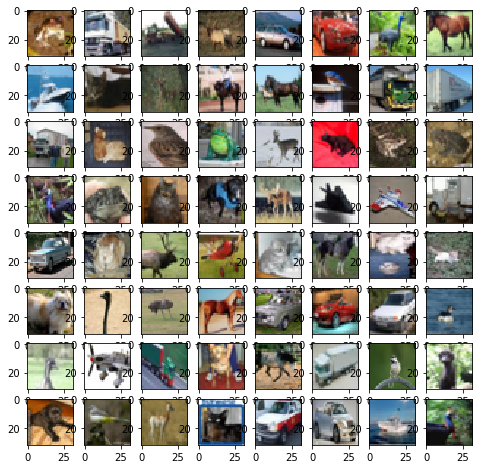

In [13]:
# plotting first 64 images
fig = plt.figure(figsize=(8,8))

for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(images_train[i], cmap = plt.cm.bone)
plt.show()

## Applying PCA

In [14]:
pca = PCA()
pca.fit_transform(x_train)

array([[ -6.40101763e+00,   2.72903876e+00,   1.50171052e+00, ...,
         -7.62287826e-04,  -1.16359323e-03,  -3.49768400e-04],
       [  8.29783385e-01,  -9.49943219e-01,   6.00375260e+00, ...,
          1.08434589e-04,   5.76715387e-04,  -7.71005927e-04],
       [  7.73019978e+00,  -1.15221023e+01,  -2.75362051e+00, ...,
         -1.04460109e-03,  -2.14105740e-04,  -3.93469526e-04],
       ..., 
       [  7.07346587e-01,  -1.13425212e+01,  -3.93914878e-01, ...,
         -3.80341568e-04,   1.86432348e-03,   1.44785229e-03],
       [  1.13679090e+01,  -3.37597765e+00,   5.56619766e+00, ...,
         -4.67096832e-04,   7.44972963e-04,  -1.67065056e-03],
       [  4.19279645e+00,  -1.18418848e+00,  -4.44596297e+00, ...,
          9.67968258e-04,   2.40363971e-04,  -2.80506224e-05]])

In [15]:
pca.explained_variance_.shape

(3072,)

In [16]:
# Calculating optimal k to have 95% (say) variance 

k = 0
total = sum(pca.explained_variance_)
current_sum = 0

while(current_sum / total < 0.95):
    current_sum += pca.explained_variance_[k]
    k += 1
k

217

In [17]:
## Applying PCA with k calcuated above

pca = PCA(n_components=k, whiten=True, svd_solver='randomized')

x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

## Prediction using Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


rf = RandomForestClassifier()
rf.fit(x_train_pca, y_train)

y_pred = rf.predict(x_test_pca)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.2819
             precision    recall  f1-score   support

          0       0.29      0.45      0.35      1000
          1       0.29      0.39      0.33      1000
          2       0.20      0.26      0.23      1000
          3       0.21      0.22      0.22      1000
          4       0.25      0.26      0.26      1000
          5       0.24      0.21      0.23      1000
          6       0.33      0.26      0.29      1000
          7       0.32      0.20      0.24      1000
          8       0.44      0.35      0.39      1000
          9       0.34      0.23      0.27      1000

avg / total       0.29      0.28      0.28     10000

[[446  71  95  42  56  47  34  36 131  42]
 [111 388  51  65  44  74  32  47  63 125]
 [156  52 263  99 149  89  91  36  34  31]
 [112 107 114 217  96 142  68  55  30  59]
 [100  61 213  90 264  67 111  49  28  17]
 [ 91  93 154 154  97 214  79  68  29  21]
 [ 82  66 162 116 152  75 255  47  21  24]
 [121 131 131  87  95  89  45 198  39  64]
 [206 126 

## Prediction using KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train_pca, y_train)

y_pred = knn.predict(x_test_pca)

accuracy_score(y_test, y_pred)

0.2293

## Using Cross Validation to find optimal value of K for KNN

In [ ]:
from sklearn.model_selection import cross_val_score
x_axis = []
y_axis = []

for i in range(1, 10, 2):
    clf = KNeighborsClassifier(n_neighbors = i)
    score = cross_val_score(clf, x_train_pca, y_train)
    print(i, score.mean())
    
    x_axis.append(i)
    y_axis.append(score.mean())
    

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x_axis, y_axis)
plt.show()

## Using optimal value of K in KNN for prediction 

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(x_train_pca, y_train)

y_pred = knn.predict(x_test_pca)



NameError: name 'accuracy_score' is not defined